# Generating a CBN object

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

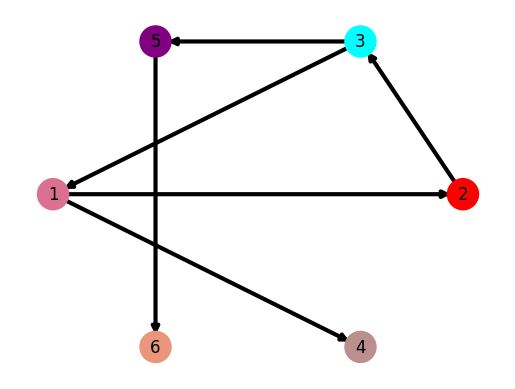

In [1]:
# external imports
import copy
import multiprocessing

# local imports
from classes.cbnetwork import CBN
from classes.globaltopology import GlobalTopology
from classes.localtemplates import LocalNetworkTemplate

# save the number of CPUs
NUM_CPUS = multiprocessing.cpu_count()

# pass the parameters
N_LOCAL_NETWORKS = 6
N_VARS_NETWORK = 20
N_OUTPUT_VARS = 2
N_INPUT_VARS = 2
V_TOPOLOGY = 2
N_MAX_CLAUSES = 2
N_MAX_LITERALS = 2

# GENERATE THE LOCAL NETWORK TEMPLATE
o_template = LocalNetworkTemplate(n_vars_network=N_VARS_NETWORK, n_input_variables=N_INPUT_VARS,
                                  n_output_variables=N_OUTPUT_VARS, n_max_of_clauses=N_MAX_CLAUSES,
                                  n_max_of_literals=N_MAX_LITERALS, v_topology=V_TOPOLOGY)

# GENERATE THE GLOBAL TOPOLOGY
o_global_topology = GlobalTopology.generate_sample_topology(v_topology=V_TOPOLOGY,
                                                            n_nodes=N_LOCAL_NETWORKS)

# generate aleatory CBN by topology
o_cbn = CBN.generate_cbn_from_template(v_topology=V_TOPOLOGY,
                                       n_local_networks=N_LOCAL_NETWORKS,
                                       n_vars_network=N_VARS_NETWORK,
                                       o_template=o_template,
                                       l_global_edges=o_global_topology.l_edges)

# Crear copias profundas del objeto original
o_cbn1 = copy.deepcopy(o_cbn) # Serial
o_cbn2 = copy.deepcopy(o_cbn) # Parallel Simple
o_cbn3 = copy.deepcopy(o_cbn) # Parallel with weights

# show the CBN Graph
o_cbn1.plot_topology()

# Find Local attractors

In [2]:
o_cbn1.find_local_attractors_sequential()

**************************************************
FIND LOCAL ATTRACTORS
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 1
--------------------------------------------------
Network: 1  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 1  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 2
--------------------------------------------------
Network: 2  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 3
--------------------------------------------------
Network: 3  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 3  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 4
-----------

In [3]:
o_cbn2.find_local_attractors_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS PARALLEL
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:
FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:  FIND ATTRACTORS FOR NETWORK:   3 126
45



--------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
--------------------------------------------------


Network:Network:Network:
Network:Network:  Network:   32 145 6      Local Scene: Local Scene: Local Scene: Local Scene: L

In [4]:
o_cbn3.find_local_attractors_parallel_with_weigths(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS WEIGHTED BALANCED

Número de workers: 12
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 1 tasks, total weight: 21
  Bucket 1: 1 tasks, total weight: 21
  Bucket 2: 1 tasks, total weight: 21
  Bucket 3: 1 tasks, total weight: 21
  Bucket 4: 1 tasks, total weight: 21
  Bucket 5: 1 tasks, total weight: 21
  Bucket 6: 0 tasks, total weight: 0
  Bucket 7: 0 tasks, total weight: 0
  Bucket 8: 0 tasks, total weight: 0
  Bucket 9: 0 tasks, total weight: 0
  Bucket 10: 0 tasks, total weight: 0
  Bucket 11: 0 tasks, total weight: 0
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



FIND ATTRACTORS FOR NETWORK:

FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS

In [5]:
o_cbn1.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: 0 - N. of Attractors: 2
Network: 1 - Scene: 0
Attractors number: 2
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
['0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0']
['1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0']
['1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Network: 1 - Scene: 1 - N. of Attracto

In [6]:
o_cbn2.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: 0 - N. of Attractors: 2
Network: 1 - Scene: 0
Attractors number: 2
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
['0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0']
['1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0']
['1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Network: 1 - Scene: 1 - N. of Attracto

In [7]:
o_cbn3.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: 0 - N. of Attractors: 2
Network: 1 - Scene: 0
Attractors number: 2
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
['0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0']
['1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0']
['1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Network: 1 - Scene: 1 - N. of Attracto

In [8]:
len(o_cbn3.l_local_networks)

6

# Find compatible pairs

In [9]:
o_cbn1.find_compatible_pairs()

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS
END FIND ATTRACTOR PAIRS (Total pairs: 210)


In [10]:
o_cbn2.find_compatible_pairs_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL)
Tareas creadas: 6
Resultados obtenidos: 6
--------------------------------------------------
END FIND COMPATIBLE ATTRACTOR PAIRS (Total pairs: 210)


In [11]:
o_cbn3.find_compatible_pairs_parallel_with_weights(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL WITH WEIGHTS)

Number of CPUs: 12
Task distribution by bucket before execution:
  Bucket 0: 1 tasks, total weight: 14
  Bucket 1: 1 tasks, total weight: 14
  Bucket 2: 1 tasks, total weight: 14
  Bucket 3: 1 tasks, total weight: 14
  Bucket 4: 1 tasks, total weight: 14
  Bucket 5: 1 tasks, total weight: 14
  Bucket 6: 0 tasks, total weight: 0
  Bucket 7: 0 tasks, total weight: 0
  Bucket 8: 0 tasks, total weight: 0
  Bucket 9: 0 tasks, total weight: 0
  Bucket 10: 0 tasks, total weight: 0
  Bucket 11: 0 tasks, total weight: 0

Number of tasks processed: 6
END FIND COMPATIBLE ATTRACTOR PAIRS (Total unique pairs: 210)


In [12]:
o_cbn1.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 121, Scene: 0
--------------------------------------------------
Coupling Variable: 121, Scene: 1
(12, 19)
(14, 19)
(8, 18)
(9, 17)
(8, 21)
(10, 18)
(9, 20)
(11, 17)
(10, 21)
(11, 20)
(13, 17)
(13, 20)
(12, 21)
(14, 18)
(12, 18)
(14, 21)
(9, 19)
(8, 17)
(8, 20)
(10, 17)
(11, 19)
(10, 20)
(13, 19)
(12, 17)
(12, 20)
(14, 17)
(14, 20)
(9, 21)
(8, 19)
(9, 18)
(11, 21)
(10, 19)
(13, 18)
(11, 18)
(13, 21)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 122, Scene: 0
--------------------------------------------------
Coupling Variable: 122, Scene: 1
(16, 35)
(15, 33)
(16, 32)
(18, 35)
(20, 32)
(18, 32)
(21, 31)
(20, 35)
(21, 34)
(17, 33)
(19, 33)
(15, 32)
(16, 31)
(15, 35)
(16, 34)
(18, 31)
(18, 34)
(21, 33)
(20, 31)
(20, 34)
(17, 35)
(17

In [13]:
o_cbn2.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 121, Scene: 0
--------------------------------------------------
Coupling Variable: 121, Scene: 1
(8, 17)
(8, 18)
(8, 19)
(8, 20)
(8, 21)
(9, 17)
(9, 18)
(9, 19)
(9, 20)
(9, 21)
(10, 17)
(10, 18)
(10, 19)
(10, 20)
(10, 21)
(11, 17)
(11, 18)
(11, 19)
(11, 20)
(11, 21)
(12, 17)
(12, 18)
(12, 19)
(12, 20)
(12, 21)
(13, 17)
(13, 18)
(13, 19)
(13, 20)
(13, 21)
(14, 17)
(14, 18)
(14, 19)
(14, 20)
(14, 21)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 122, Scene: 0
--------------------------------------------------
Coupling Variable: 122, Scene: 1
(15, 31)
(15, 32)
(15, 33)
(15, 34)
(15, 35)
(16, 31)
(16, 32)
(16, 33)
(16, 34)
(16, 35)
(17, 31)
(17, 32)
(17, 33)
(17, 34)
(17, 35)
(18, 31)
(18, 32)
(18, 33)
(18, 34)
(18, 35)
(19, 31)
(19

In [14]:
o_cbn3.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 121, Scene: 0
--------------------------------------------------
Coupling Variable: 121, Scene: 1
(12, 19)
(14, 19)
(8, 18)
(9, 17)
(8, 21)
(10, 18)
(9, 20)
(11, 17)
(10, 21)
(11, 20)
(13, 17)
(13, 20)
(12, 21)
(14, 18)
(12, 18)
(14, 21)
(9, 19)
(8, 17)
(8, 20)
(10, 17)
(11, 19)
(10, 20)
(13, 19)
(12, 17)
(12, 20)
(14, 17)
(14, 20)
(9, 21)
(8, 19)
(9, 18)
(11, 21)
(10, 19)
(13, 18)
(11, 18)
(13, 21)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 122, Scene: 0
--------------------------------------------------
Coupling Variable: 122, Scene: 1
(16, 35)
(15, 33)
(16, 32)
(18, 35)
(20, 32)
(18, 32)
(21, 31)
(20, 35)
(21, 34)
(17, 33)
(19, 33)
(15, 32)
(16, 31)
(15, 35)
(16, 34)
(18, 31)
(18, 34)
(21, 33)
(20, 31)
(20, 34)
(17, 35)
(17

# Mount stable attractor fields

In [15]:
o_cbn1.mount_stable_attractor_fields()

**************************************************
FIND ATTRACTOR FIELDS
--------------------------------------------------
END MOUNT ATTRACTOR FIELDS


In [16]:
o_cbn2.mount_stable_attractor_fields_parallel(num_cpus=NUM_CPUS)

**************************************************
MOUNT STABLE ATTRACTOR FIELDS (PARALLEL)

Procesando arista 2 con 35 pares base
Base actualizada: 175 pares

Procesando arista 3 con 175 pares base
Base actualizada: 875 pares

Procesando arista 4 con 875 pares base
Base actualizada: 4375 pares

Procesando arista 5 con 4375 pares base
Base actualizada: 3125 pares

Procesando arista 6 con 3125 pares base
Base actualizada: 15625 pares
--------------------------------------------------
END MOUNT STABLE ATTRACTOR FIELDS (PARALLEL)


In [17]:
o_cbn3.mount_stable_attractor_fields_parallel_chunks()

**************************************************
MOUNT STABLE ATTRACTOR FIELDS (PARALLEL CHUNKS)

Processing edge 2 with 35 base pairs; chunk size: 3
  Chunk 0: 3 pairs
  Chunk 1: 3 pairs
  Chunk 2: 3 pairs
  Chunk 3: 3 pairs
  Chunk 4: 3 pairs
  Chunk 5: 3 pairs
  Chunk 6: 3 pairs
  Chunk 7: 3 pairs
  Chunk 8: 3 pairs
  Chunk 9: 3 pairs
  Chunk 10: 3 pairs
  Chunk 11: 2 pairs
Updated base: 175 pairs

Processing edge 3 with 175 base pairs; chunk size: 15
  Chunk 0: 15 pairs
  Chunk 1: 15 pairs
  Chunk 2: 15 pairs
  Chunk 3: 15 pairs
  Chunk 4: 15 pairs
  Chunk 5: 15 pairs
  Chunk 6: 15 pairs
  Chunk 7: 15 pairs
  Chunk 8: 15 pairs
  Chunk 9: 15 pairs
  Chunk 10: 15 pairs
  Chunk 11: 10 pairs
Updated base: 875 pairs

Processing edge 4 with 875 base pairs; chunk size: 73
  Chunk 0: 73 pairs
  Chunk 1: 73 pairs
  Chunk 2: 73 pairs
  Chunk 3: 73 pairs
  Chunk 4: 73 pairs
  Chunk 5: 73 pairs
  Chunk 6: 73 pairs
  Chunk 7: 73 pairs
  Chunk 8: 73 pairs
  Chunk 9: 73 pairs
  Chunk 10: 73 pai

In [18]:
o_cbn1.show_attractor_fields()

LIST OF ATTRACTOR FIELDS
1 -> [33, 6, 42, 12, 19, 24]
2 -> [33, 6, 42, 12, 19, 27]
3 -> [33, 6, 42, 12, 19, 26]
4 -> [33, 6, 42, 12, 19, 25]
5 -> [33, 6, 42, 12, 19, 28]
6 -> [33, 6, 39, 12, 19, 24]
7 -> [33, 6, 39, 12, 19, 27]
8 -> [33, 6, 39, 12, 19, 26]
9 -> [33, 6, 39, 12, 19, 25]
10 -> [33, 6, 39, 12, 19, 28]
11 -> [33, 38, 6, 12, 19, 24]
12 -> [33, 38, 6, 12, 19, 27]
13 -> [33, 38, 6, 12, 19, 26]
14 -> [33, 38, 6, 12, 19, 25]
15 -> [33, 38, 6, 12, 19, 28]
16 -> [33, 6, 41, 12, 19, 24]
17 -> [33, 6, 41, 12, 19, 27]
18 -> [33, 6, 41, 12, 19, 26]
19 -> [33, 6, 41, 12, 19, 25]
20 -> [33, 6, 41, 12, 19, 28]
21 -> [33, 6, 40, 12, 19, 24]
22 -> [33, 6, 40, 12, 19, 27]
23 -> [33, 6, 40, 12, 19, 26]
24 -> [33, 6, 40, 12, 19, 25]
25 -> [33, 6, 40, 12, 19, 28]
26 -> [33, 3, 42, 12, 19, 25]
27 -> [33, 3, 42, 12, 19, 28]
28 -> [33, 3, 42, 12, 19, 24]
29 -> [33, 3, 42, 12, 19, 27]
30 -> [33, 3, 42, 12, 19, 26]
31 -> [33, 3, 39, 12, 19, 25]
32 -> [33, 3, 39, 12, 19, 28]
33 -> [33, 3, 39, 12, 19

In [19]:
o_cbn2.show_attractor_fields()

LIST OF ATTRACTOR FIELDS
1 -> [34, 7, 40, 10, 21, 26]
2 -> [33, 6, 41, 12, 21, 24]
3 -> [35, 5, 38, 13, 21, 28]
4 -> [32, 5, 39, 10, 21, 24]
5 -> [33, 6, 42, 14, 17, 26]
6 -> [32, 5, 39, 13, 17, 28]
7 -> [34, 3, 38, 12, 20, 24]
8 -> [33, 5, 42, 13, 21, 24]
9 -> [32, 3, 38, 10, 17, 25]
10 -> [34, 7, 40, 13, 18, 26]
11 -> [32, 3, 42, 13, 19, 24]
12 -> [34, 4, 40, 13, 21, 28]
13 -> [7, 39, 14, 19, 25, 31]
14 -> [34, 38, 6, 13, 21, 26]
15 -> [33, 5, 39, 14, 20, 24]
16 -> [33, 6, 41, 11, 19, 24]
17 -> [33, 6, 39, 12, 17, 24]
18 -> [34, 4, 42, 11, 17, 26]
19 -> [6, 42, 11, 21, 26, 31]
20 -> [5, 38, 10, 19, 26, 31]
21 -> [32, 4, 38, 10, 21, 25]
22 -> [33, 39, 7, 11, 19, 27]
23 -> [4, 42, 13, 18, 24, 31]
24 -> [38, 7, 10, 20, 28, 31]
25 -> [33, 4, 38, 10, 20, 24]
26 -> [33, 4, 38, 12, 21, 27]
27 -> [32, 4, 10, 42, 21, 27]
28 -> [3, 40, 14, 20, 26, 31]
29 -> [34, 4, 39, 14, 17, 26]
30 -> [35, 6, 40, 13, 17, 27]
31 -> [33, 7, 41, 13, 18, 24]
32 -> [3, 39, 12, 19, 25, 31]
33 -> [34, 39, 7, 13, 20

In [20]:
o_cbn3.show_attractor_fields()

LIST OF ATTRACTOR FIELDS
1 -> [10, 21, 34, 7, 40, 26]
2 -> [12, 21, 33, 6, 41, 24]
3 -> [13, 21, 35, 5, 38, 28]
4 -> [10, 21, 32, 5, 39, 24]
5 -> [14, 17, 33, 6, 42, 26]
6 -> [13, 17, 32, 5, 39, 28]
7 -> [12, 20, 34, 3, 38, 24]
8 -> [13, 21, 33, 5, 42, 24]
9 -> [10, 17, 32, 3, 38, 25]
10 -> [13, 18, 34, 7, 40, 26]
11 -> [13, 19, 32, 3, 42, 24]
12 -> [13, 21, 34, 4, 40, 28]
13 -> [14, 19, 31, 7, 39, 25]
14 -> [13, 21, 34, 6, 38, 26]
15 -> [14, 20, 33, 5, 39, 24]
16 -> [11, 19, 33, 6, 41, 24]
17 -> [12, 17, 33, 6, 39, 24]
18 -> [11, 17, 34, 4, 42, 26]
19 -> [11, 21, 31, 6, 42, 26]
20 -> [10, 19, 31, 5, 38, 26]
21 -> [10, 21, 32, 4, 38, 25]
22 -> [11, 19, 33, 7, 39, 27]
23 -> [13, 18, 31, 4, 42, 24]
24 -> [10, 20, 31, 7, 38, 28]
25 -> [10, 20, 33, 4, 38, 24]
26 -> [12, 21, 33, 4, 38, 27]
27 -> [10, 21, 32, 4, 42, 27]
28 -> [14, 20, 31, 3, 40, 26]
29 -> [14, 17, 34, 4, 39, 26]
30 -> [13, 17, 35, 6, 40, 27]
31 -> [13, 18, 33, 7, 41, 24]
32 -> [12, 19, 31, 3, 39, 25]
33 -> [13, 20, 34, 7, 39